In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

## Q1
a) Plot function

[0.         0.09828658 0.18991231 0.27511089 0.35411605 0.42716149
 0.49448094 0.55630809 0.61287668 0.66442041 0.711173   0.75336816
 0.79123961 0.82502106 0.85494622 0.88124881 0.90416255 0.92392114
 0.94075831 0.95490776 0.96660321 0.97607837 0.98356697 0.9893027
 0.9935193  0.99645046 0.99832992 0.99939137 0.99986854 0.99999513
 1.00000487 1.00013146 1.00060863 1.00167008 1.00354954 1.0064807
 1.0106973  1.01643303 1.02392163 1.03339679 1.04509224 1.05924169
 1.07607886 1.09583745 1.11875119 1.14505378 1.17497894 1.20876039
 1.24663184 1.288827   1.33557959 1.38712332 1.44369191 1.50551906
 1.57283851 1.64588395 1.72488911 1.81008769 1.90171342 2.        ]


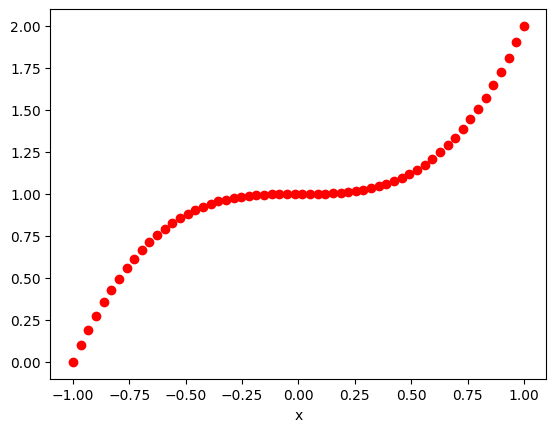

In [2]:
X = np.linspace(-1, 1, 60)
y = X ** 3 + 1

#observe the numpy array
print(y)

plt.scatter(X, y, color='red')
plt.xlabel('x')

plt.show()

Q1 b) Take a training set and introduce noise

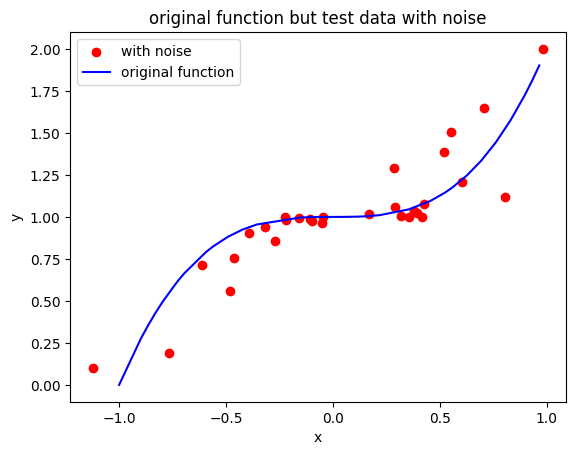

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)
random_noise_x = (np.random.random_sample((30,)) - np.random.random_sample((30,))) / 2
# print(X_train)
X_train = X_train + random_noise_x

#sort the test data so that we can plot it
X_test_sorted = np.sort(X_test)
y_test_sorted = X_test_sorted ** 3 + 1  

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(X_test_sorted, y_test_sorted, color='blue', label="original function")
plt.title("original function but test data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

c) perform a linear regression 

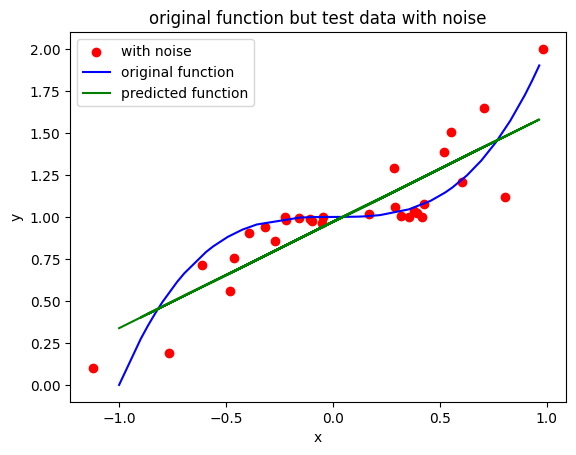

In [4]:
regr = LinearRegression().fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_predict = regr.predict(X_test.reshape(-1,1))

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(X_test_sorted, y_test_sorted, color='blue', label="original function")
plt.plot(X_test, y_predict, color='green', label="predicted function")
plt.title("original function but test data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

d) Perform a polynomial regression of n dimensions, and observe their plot on the original regression

Sum of squares error:
[0.3470872006746865, 0.34766870495535834, 0.36385143141782805, 0.4055008203664475]


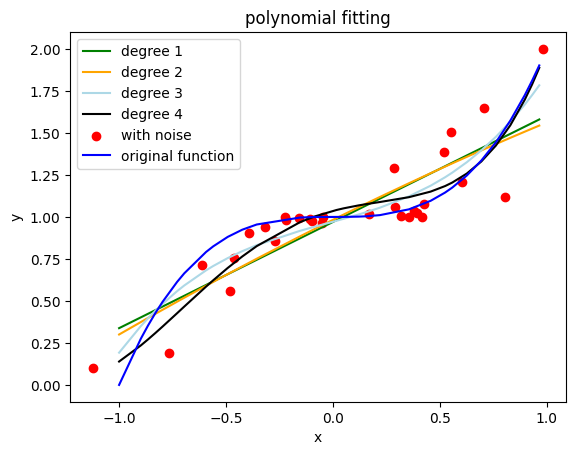

In [5]:
colour = ['green', 'orange', 'lightblue', 'black', 'purple']

#The data is picked at random. sort by x so we can create a continuous line
ds_sorted_train = pd.DataFrame({"X": X_train, 'y': y_train}, columns=['X', 'y'])
ds_sorted_train = ds_sorted_train.sort_values(by=['X'])
# print(ds_sorted_train.head())

ds_sorted_test = pd.DataFrame({"X": X_test, 'y': y_test}, columns=['X', 'y'])
ds_sorted_test = ds_sorted_test.sort_values(by=['X'])

SSE = []

for i in range(1,5):
    #create a regression of dimension n
    polynomial = PolynomialFeatures(degree=i)
    
    #transform the data inputted in
    X_train_polynomial = polynomial.fit_transform(ds_sorted_train["X"].to_numpy().reshape(-1,1))
    X_test_polynomial = polynomial.fit_transform(ds_sorted_test["X"].to_numpy().reshape(-1,1))


    regr = LinearRegression().fit(X_train_polynomial, ds_sorted_train["y"].to_numpy().reshape(-1,1))
    y_predict = regr.predict(X_test_polynomial)

    SSE.append(np.mean((y_predict - ds_sorted_test['y'].to_numpy()) ** 2))

    plt.plot(ds_sorted_test["X"].to_numpy().reshape(-1,1), y_predict, color=colour[i-1], label=f"degree {i}")

plt.scatter(X_train, y_train, color='red', label="with noise")
plt.plot(ds_sorted_test['X'], ds_sorted_test['y'], color='blue', label="original function")

plt.title("polynomial fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
print("Sum of squares error:")
print(SSE)

b, c) fit a linear regression model to the data and assess the coefficients

In [6]:
pokemon = pd.read_csv('pokemonregr.csv')
# w3_regr = w3_regr.rename(columns={0: "x1", 1: "y"})
# print(pokemon['attack'])
pokemon = pokemon.dropna()
regr = LinearRegression().fit(pokemon.loc[:,'attack':'speed'], pokemon['weight_kg'])

print(regr.coef_)


[ 3.77397553e-01  5.67721520e-01  5.35146255e+01  2.45998765e-02
  1.53453033e-01 -4.21539817e-01]


d) given the magnitude of the coefficients, it appears (from face value) that the height has the greatest effect on the weight of a pokemon. However, we must also realise that these figures are not all standardised, i.e. the magnitudes of some of these parameters are much greater than others, as is the case for height_m vs sp_attack. normalise the data.

In [7]:
X_scaled = preprocessing.StandardScaler().fit(pokemon.loc[:,'attack':'speed']).transform(pokemon.loc[:,'attack':'speed'])

regr = LinearRegression().fit(X_scaled, pokemon['weight_kg'])

print(regr.coef_)

[ 12.15337036  17.47803453  57.77623107   0.79121435   4.29529442
 -12.17646811]


e) It still appears that height has the greatest effect on the weight of a pokemon

## Q3
a) fit a logistic regression to the data in w3clasif

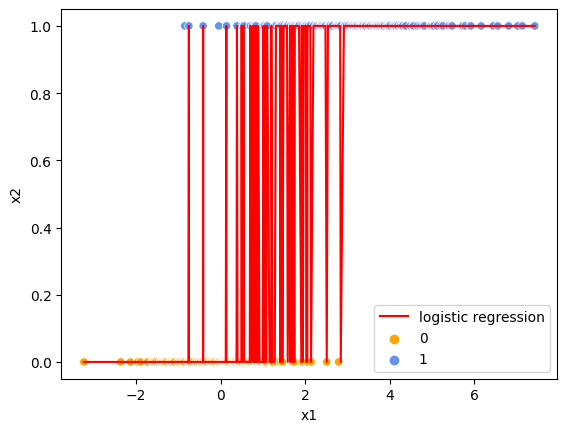

2
[[1.76092381 1.76042935]]


In [47]:
classif = pd.read_csv('w3classif.csv', header=None).dropna().sort_values(by=[0])
# print(classif.iloc[:,2].to_numpy().reshape(-1,1).shape)
clf = LogisticRegression(random_state=0).fit(classif.iloc[:,0:2].to_numpy(), classif.iloc[:,2].to_numpy())

cmap_bold = ["darkorange", "darkblue"]
cmap_light = ["orange", "cornflowerblue"]

y_predict = clf.predict(classif.iloc[:,0:2].to_numpy())

plt.plot(classif.iloc[:,0].to_numpy(), y_predict, color='red', label="logistic regression")

sns.scatterplot(
    x=classif.iloc[:,0].to_numpy(),
    y=classif.iloc[:,2].to_numpy(),
    hue=classif.iloc[:,2].to_numpy(),
    palette=cmap_light,
    alpha=1.0
)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

print(clf.n_features_in_)
print(clf.coef_)